In [37]:
import numpy as np
import matplotlib.pyplot as plt
from general_functions import *
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
# simplistic model
# exploring the possible values that the eigenvalue can take

def eval1(N, S, M, mu): return  mu/(N*M*S) * (1-2/M) * (1-1/S)

def eval2(N, S, M, mu): return -mu/(N*M*S) * (1-2/M) * (1-2/S)

def eval3(N, S, M, mu): return  mu/(N*M*S) * (2/M * (1-1/S) - (1-2/M) * (1-2/S))

def eval4(N, S, M, mu): return -mu/(N*M*S) * (2/(M*(N-1)) * (1-1/S) + (1-2/M) * (1-2/S))

def theoretical_evals(N, S, M, mu):
    print('\ntheoretical eigenvalues')
    print(f'w = {eval1(N, S, M, mu): .2e} ({N*M}-fold) - unphysical')
    print(f'w = {eval2(N, S, M, mu): .2e} ({N*(S-1)}-fold)')
    print(f'w = {eval3(N, S, M, mu): .2e} ({(S-1)*(M-1)}-fold)')
    print(f'w = {eval4(N, S, M, mu): .2e} ({(N-1)*(S-1)*(M-1)}-fold)\n')

# roh l'echec

In [33]:
e_val = eval3(N=2, S=7, M=7, mu=0.1)
print(e_val)

-0.0002707205331112037


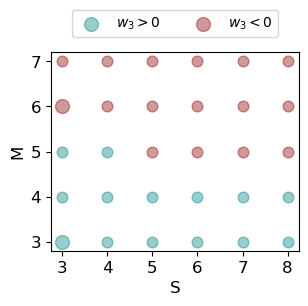

In [86]:
fontsize = 12

N = 2
S_max, M_max = 8, 7
Ss = np.arange(3,S_max+1)
Ms = np.arange(3,M_max+1)

evals = []
for S in Ss:
    for M in Ms:
        evals.append(eval3(N,S,M,0.1))


# cmap = cm.get_cmap('cool')
# norm = colors.Normalize(vmin=min(evals), vmax=max(evals))
# colours = [cmap(norm(value)) for value in evals]
# evals = np.array(evals)
# colours = np.array(colours)

fig, ax = plt.subplots(figsize=(4, 4))

ax.set_aspect(1)

grid = np.zeros((S_max, M_max))

for S in Ss:
    for M in Ms:
        e_val = eval3(N,S,M,0.1)
        # color = colours[evals==e_val]
        color = 'teal' if e_val > 0 else 'darkred'
        if   S==3 and M==3: ax.scatter([S], [M], color=color, marker='o', alpha=0.4, s=100, label=f'$w_3 > 0$')
        elif S==3 and M==6: ax.scatter([S], [M], color=color, marker='o', alpha=0.4, s=100, label=f'$w_3 < 0$')
        else: im = ax.scatter([S], [M], color=color, marker='o', alpha=0.4, s=60)

ax.set_xlabel('S', fontsize=fontsize); ax.set_ylabel('M', fontsize=fontsize)
ax.set_xticks(Ss)
ax.set_yticks(Ms)
ax.set_xticklabels(Ss, fontsize=fontsize)
ax.set_yticklabels(Ms, fontsize=fontsize)

# fig.colorbar(im, ax=ax, norm=norm)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height*0.8])

# Put a legend to the right of the current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2) #fontsize=fontsize,
fig.savefig('/Users/casimirfisch/Desktop/Uni/MPhys/code/plots/miscellaneous/'+'eval_sign.png', dpi=400)
plt.show()

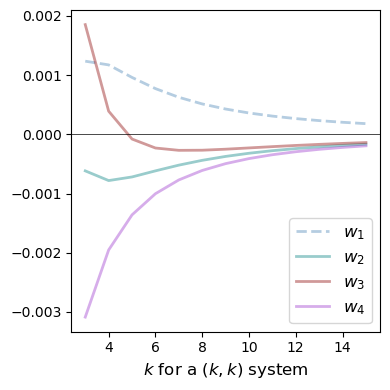

In [84]:
fontsize = 12

N, mu = 2, 0.1
ks = np.arange(3, 16)
eval1s, eval2s, eval3s, eval4s = [], [], [], []

for k in ks:
    S = M = k
    eval1s.append(eval1(N, S, M, mu))
    eval2s.append(eval2(N, S, M, mu))
    eval3s.append(eval3(N, S, M, mu))
    eval4s.append(eval4(N, S, M, mu))

fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
ax.plot(ks, eval1s, label=f'$w_1$', lw=2, ls='dashed', c='steelblue', alpha=0.4)
ax.plot(ks, eval2s, label=f'$w_2$', lw=2, c='teal', alpha=0.4)
ax.plot(ks, eval3s, label=f'$w_3$', lw=2, c='darkred', alpha=0.4)
ax.plot(ks, eval4s, label=f'$w_4$', lw=2, c='darkorchid', alpha=0.4)
ax.axhline(y=0., lw=0.5, c='k')
ax.set_xlabel(f'$k$ for a $(k,k)$ system', fontsize=fontsize)

ax.legend(loc='lower right', fontsize=fontsize)
fig.savefig('/Users/casimirfisch/Desktop/Uni/MPhys/code/plots/miscellaneous/'+'evals_squaresystem.png', dpi=400)

plt.show()

configuration (N, S, M, lambda) = (2, 3, 3, 0.1)
----------------------------------------------------------------------------
w = -3.09e-03 /// * - *
w = -3.09e-03 /// * - *
w = -3.09e-03 /// * - *
w = -3.09e-03 /// * - *
w =  1.85e-03 /// * - *
w =  1.85e-03 /// * - *
w =  1.85e-03 /// * - *
w =  1.85e-03 /// * - *
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w =  1.23e-03 /// constraint not satisfied - coef vanishes!
w = -6.17e-04 /// * - *
w = -6.17e-04 /// * - *
w = -6.17e-04 /// * - *
w = -6.17e-04 /// * - *


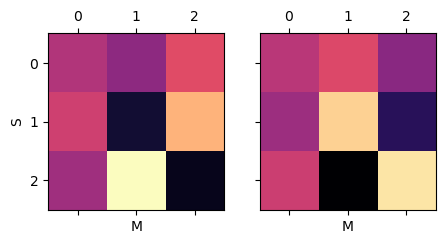

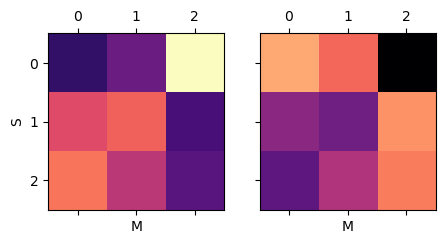

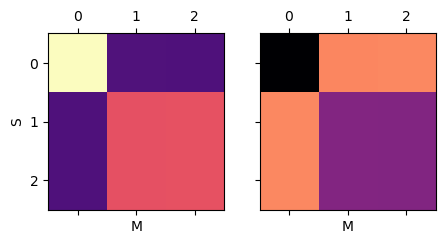

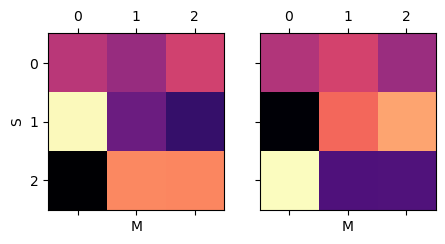

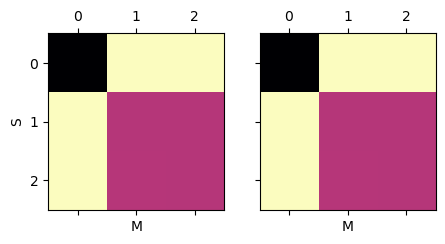

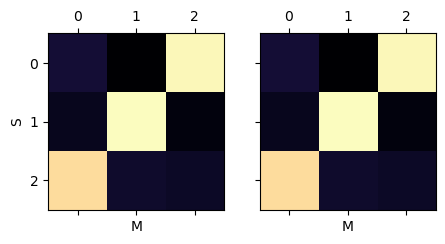

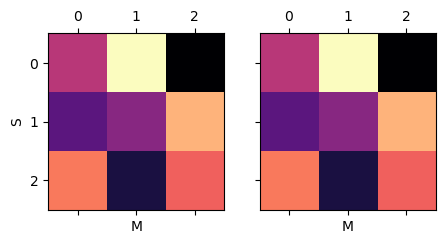

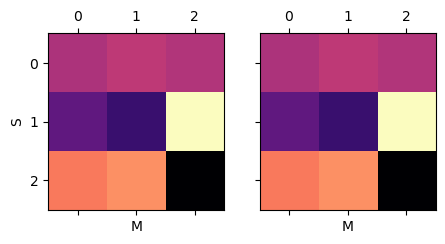

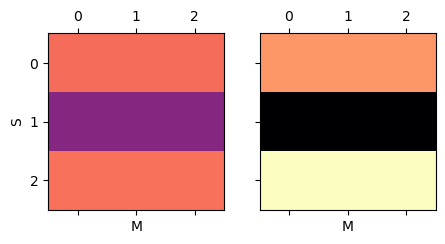

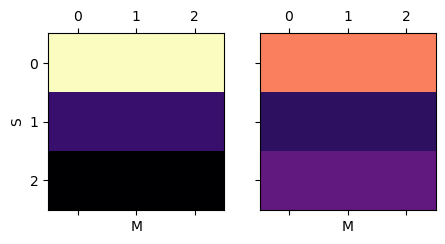

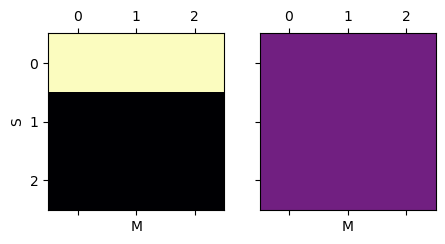

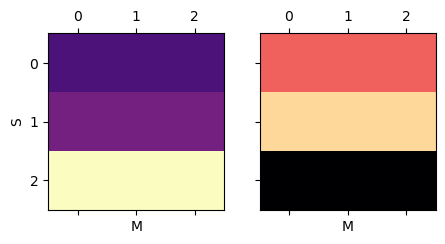


theoretical eigenvalues
w =  1.23e-03 (6-fold) - unphysical
w = -6.17e-04 (4-fold)
w =  1.85e-03 (4-fold)
w = -3.09e-03 (4-fold)



In [5]:
N, S, M, mu = 2, 3, 3, 0.1
eigen_vals_vecs(initiate_phi(N, S, M), N, S, M, mu, show_evecs=True, colormap='magma')
theoretical_evals(N, S, M, mu)

In [22]:
1/540

0.001851851851851852

In [23]:
1/324

0.0030864197530864196